In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statistics
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
from  matplotlib.ticker import PercentFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import skew, kurtosis

In [4]:
def tsplot(y,lags=None,figsize=(12,7),style='bmh'):
    """
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y,pd.Series):
        y=pd.Series(y)
    with plt.style.context(style):
        fig=plt.figure(figsize=figsize)
        layout=(2,2)
        ts_ax=plt.subplot2grid(layout,(0,0),colspan=2)
        acf_ax=plt.subplot2grid(layout,(1,0))
        pacf_ax=plt.subplot2grid(layout,(1,1))
        
        y.plot(ax=ts_ax)
        p_value=sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
        smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
        plt.tight_layout()

In [5]:
inputdf=pd.read_csv("Data/2013-2018Label.csv",sep=';',index_col=['UTC Timestamp'])

In [10]:
def realpriceplot(inputdf,figsize=(25,10)):
    x=range(0,168)
    y1=inputdf.loc['2018-01-01 00':'2018-12-31 23','price electricity real']  
    del y1.index.name
    index = pd.to_datetime(y1.index)
    monthdays=[31,28,31,30,31,30,31,31,30,31,30,31]
    monthsum=[sum(monthdays[:i]) for i in range(0,12)]
    ticks_to_use=[index[item*24] for item in monthsum]
    labels=[i.strftime("%m/%d") for i in ticks_to_use]
    fig=plt.figure(figsize=figsize)
    plt.plot(index,y1,label='Day-ahead electricity prices') 
    ax=plt.gca()
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels,fontsize=19)
    plt.legend(fontsize=19,loc=0)
    #plt.grid(True)
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=19)
    plt.xlabel('Time (h)',fontsize=19)
    plt.ylabel('Price (€/MWh)',fontsize=19)
    #plt.rcParams["figure.figsize"] = (24,10)
    plt.savefig('FiguresInTheThesis/Day_ahead_prices.png',dpi=300,bbox_inches='tight')
    plt.show()

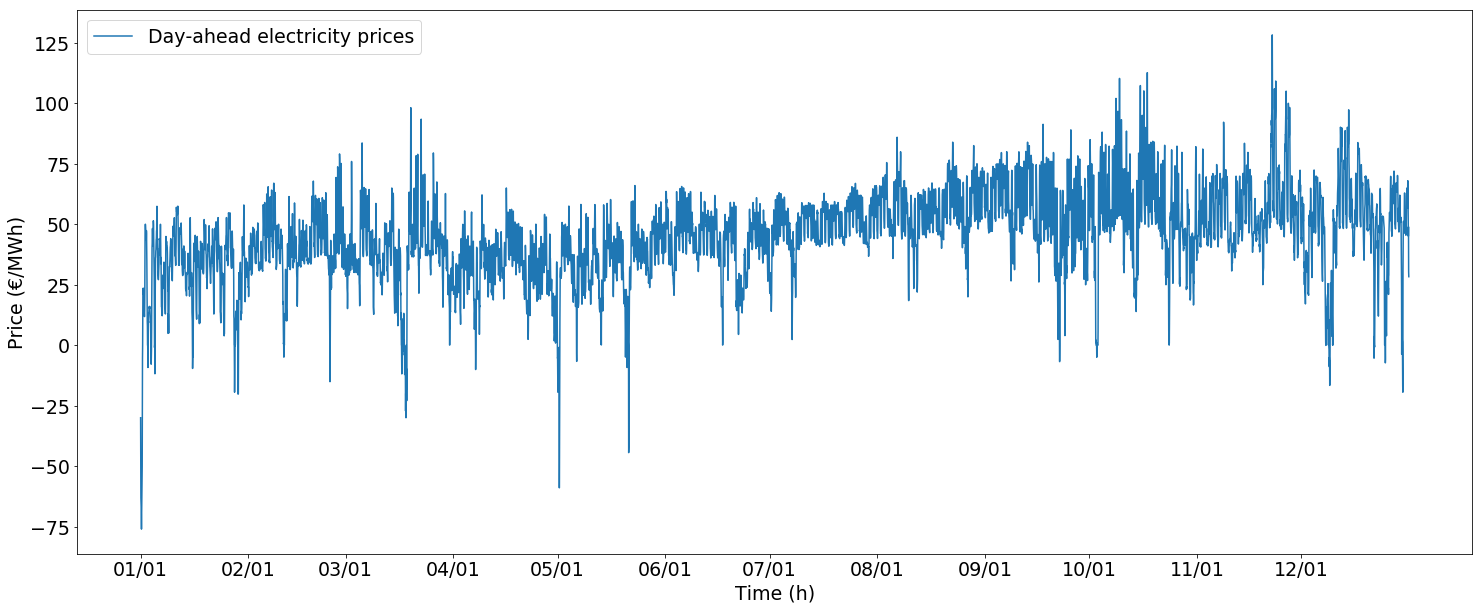

In [11]:
realpriceplot(inputdf)

In [12]:
def autocorrelationplot(y,lags=None,figsize=(16,4),style='bmh'):
    """
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y,pd.Series):
        y=pd.Series(y)
    y.index = pd.to_datetime(y.index)
    xi=list(range(0,192,24))
    yi=np.arange(-0.6,1.2,step=0.2)
    #plt.xticks(xi)
    with plt.style.context(style):
        fig=plt.figure(figsize=figsize)
        layout=(1,2)
        #ts_ax=plt.subplot2grid(layout,(0,0),colspan=2)
        #ts_ax.annotate('MAE',loc='upper left',)
        acf_ax=plt.subplot2grid(layout,(0,0))
        pacf_ax=plt.subplot2grid(layout,(0,1))
        
        #y.plot(ax=ts_ax,use_index=True,label='MAE')
        #p_value=sm.tsa.stattools.adfuller(y)[1]
        #ts_ax.set_title('Time Series Analysis Plots\n MAE: {0:.3f}'.format(
        #    np.round(np.mean(np.absolute(y)),decimals=3)))
        #acf_ax.grid(False)
        #pacf_ax.grid(False)
        acf_ax.set_xticks (xi)
        acf_ax.set_xlabel('Lag',fontsize=14)
        acf_ax.set_ylabel('Autocorrelation',fontsize=14)
        acf_ax.tick_params(axis='both', which='major', labelsize=14)
        pacf_ax.set_xticks(xi)
        pacf_ax.set_yticks(yi)
        pacf_ax.set_xlabel('Lag',fontsize=14)
        pacf_ax.set_ylabel('Partial autocorrelation',fontsize=14)
        pacf_ax.tick_params(axis='both', which='major', labelsize=14)
        #plt.xticks(xi)
        smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax,title='')
        smt.graphics.plot_acf(y,lags=lags,ax=acf_ax,title='')
        plt.savefig('FiguresInTheThesis/acfresidualsfundamental.png',dpi=300,bbox_inches='tight')
        plt.tight_layout()

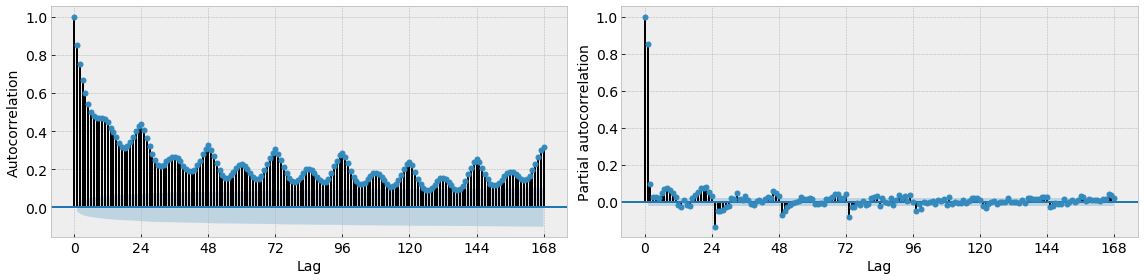

In [13]:
autocorrelationplot(inputdf.loc['2018-01-01 00':'2018-12-31 23','price difference'],lags=168)

In [14]:
def fundamentalmodel(inputdf,figsize=(25,10)):
    y=inputdf.loc['2018-08-01 00':'2018-08-31 23','price electricity real']
    yhat=inputdf.loc['2018-08-01 00':'2018-08-31 23','price estimator Model']
    index = pd.to_datetime(y.index)
    y=y.values
    yhat=yhat.values    
    ticks_to_use= index[::72]
    labels=[ i.strftime("%m/%d") for i in ticks_to_use]
    ylabels=np.arange(0,110,step=10)
   
    fig=plt.figure(figsize=figsize)
    plt.plot(index,y,label='Actual day-ahead prices') 
    plt.plot(index,yhat,label='Predicted prices of fundamental model') 
    ax=plt.gca()
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels,fontsize=19)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 19)
    plt.legend(fontsize=19,loc=0)
    plt.ylabel('Price (€/MWh)',fontsize=19)
    plt.xlabel('Time (h)',fontsize=19)
    plt.savefig('FiguresInTheThesis/actualvsfundamental.png',dpi=300,bbox_inches='tight')
    plt.show()

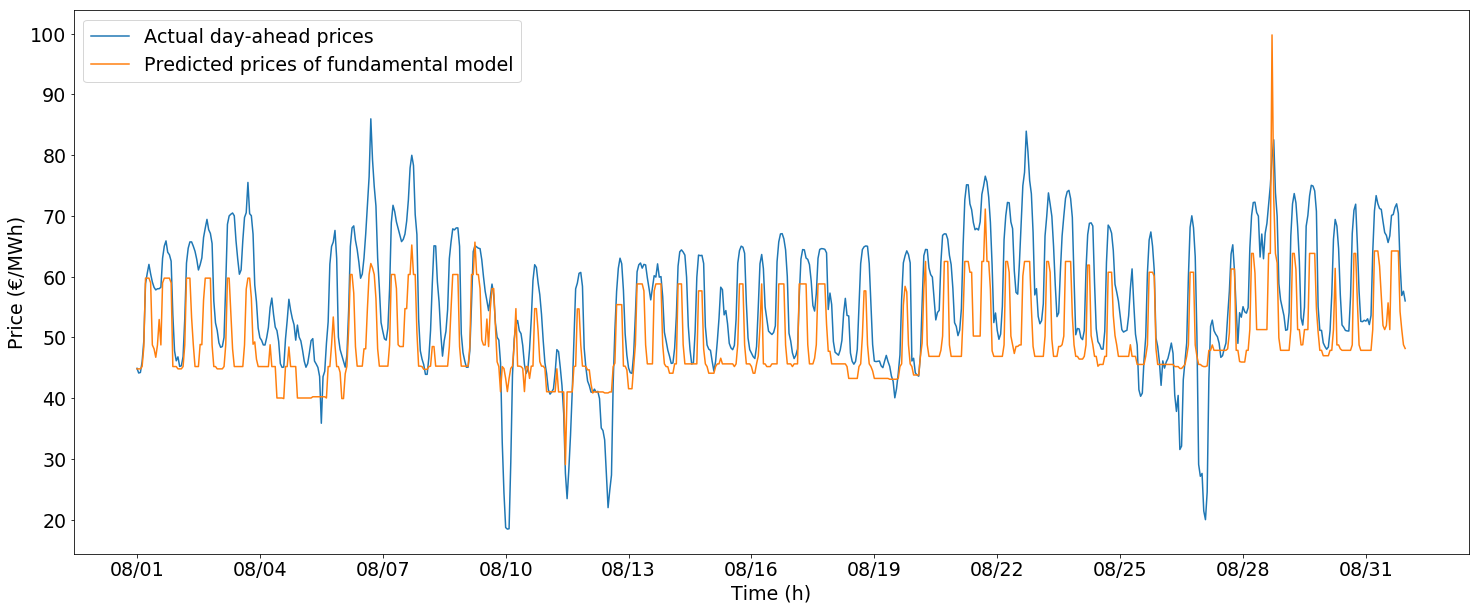

In [15]:
fundamentalmodel(inputdf)

In [14]:
def residualplot1(inputdf):
    x=range(0,168)
    y1=inputdf.loc['2018-01-01 00':'2018-12-31 23','price difference']  
    del y1.index.name
    index = pd.to_datetime(y1.index)
    monthdays=[31,28,31,30,31,30,31,31,30,31,30,31]
    monthsum=[sum(monthdays[:i]) for i in range(0,12)]
    ticks_to_use=[index[item*24] for item in monthsum]
    labels=[i.strftime("%m/%d") for i in ticks_to_use]
    plt.plot(index,y1,label='Residuals of the fundamental model',color='red') 
    ax=plt.gca()
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels,fontsize=19)
    plt.legend(fontsize=19,loc=0)
    #plt.grid(True)
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=19)
    plt.xlabel('Time (h)',fontsize=19)
    plt.ylabel('Residuals (€/MWh)',fontsize=19)
    plt.rcParams["figure.figsize"] = (24,10)
    plt.savefig('FiguresInTheThesis/residualsfundamental.png',dpi=300,bbox_inches='tight')
    plt.show()

In [18]:
def residualacfplot(inputdf,lags,figsize=(32,25),style='bmh'):
    y1=inputdf.loc['2016-09-12 00':'2016-09-25 23','price difference']
    y2=inputdf.loc['2017-01-01 00':'2017-01-14 23','price difference']
    
   
    xi=list(range(0,lags+24,12))
    yi=np.arange(-0.6,1.2,step=0.2)
    plt.rcParams["text.usetex"]=True
    with plt.style.context(style):
        fig=plt.figure(figsize=figsize)
        layout=(3,2)
       
        acf_ax1=plt.subplot2grid(layout,(0,0))
        acf_ax2=plt.subplot2grid(layout,(0,1))
       
        
        acf_ax1.set_xticks (xi)
        acf_ax1.set_yticks (yi)
        acf_ax1.set_xlabel('Lag',fontsize=24)
        acf_ax1.set_ylabel('Autocorrelation',fontsize=24)
        acf_ax1.tick_params(axis='both', which='major', labelsize=24)
        
        
        acf_ax2.set_xticks (xi)
        acf_ax2.set_xlabel('Lag',fontsize=24)
        #acf_ax2.set_ylabel('Autocorrelation',fontsize=19)
        acf_ax2.tick_params(axis='both', which='major', labelsize=24)
        
        

        
        #acf_ax1.tick_params(labelbottom='False')
        #acf_ax2.tick_params(labelbottom='False')
        #acf_ax3.tick_params(labelbottom='False')
        #acf_ax4.tick_params(labelbottom='False')
        
          
        smt.graphics.plot_acf(y1,lags=lags,ax=acf_ax1,title='')
        smt.graphics.plot_acf(y2,lags=lags,ax=acf_ax2,title='')
        
        
        acf_ax1.set_title('2016/09/12 - 2016/09/25',fontsize=28)
        acf_ax2.set_title('2017/01/01 - 2017/01/14',fontsize=28)

        
        
        
        plt.savefig('FiguresInTheThesis/acf2016-2017.png',dpi=300,bbox_inches='tight')
        plt.tight_layout()

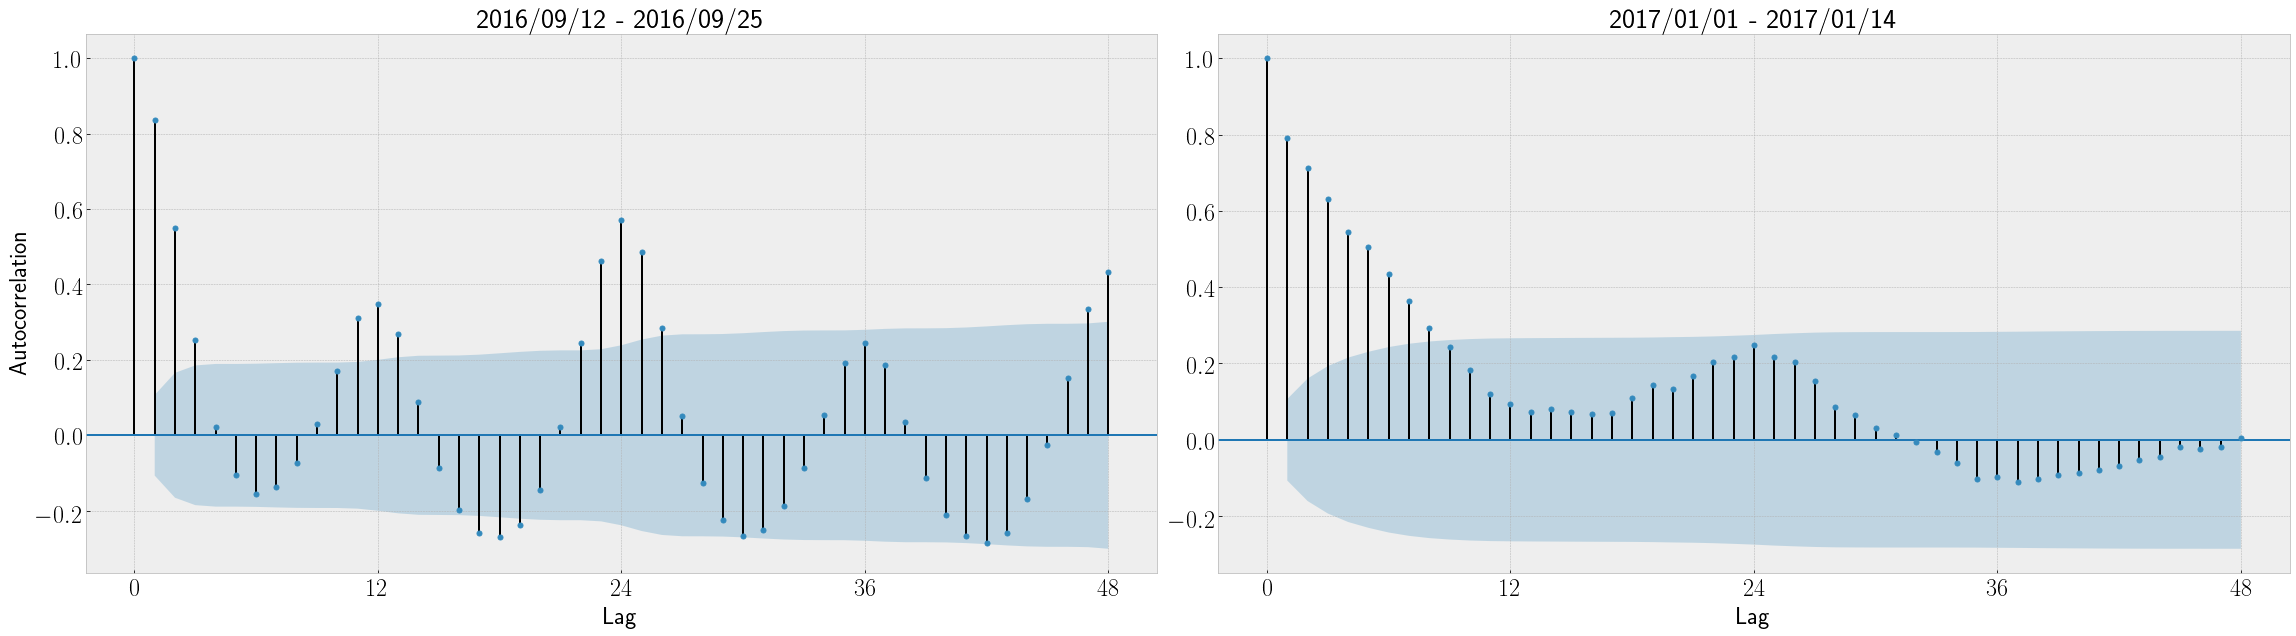

In [19]:
residualacfplot(inputdf,48)

In [20]:
def acfplot(inputdf,lags,figsize=(32,20),style='bmh'):
    y1=inputdf.loc['2018-01-01 00':,'Error Direct MLP']
    y2=inputdf.loc['2018-01-01 00':,'Error SARIMAX']
    y3=inputdf.loc['2018-01-01 00':,'Error Recursive MLP']
    y4=inputdf.loc['2018-01-01 00':,'Error Encoder-Decoder']
    y5=inputdf.loc['2018-01-01 00':,'Error KNN']
    y6=inputdf.loc['2018-01-01 00':,'Error Naive']
   
    xi=list(range(0,lags+24,24))
    yi=np.arange(-0.6,1.2,step=0.2)
    plt.rcParams["text.usetex"]=True
    with plt.style.context(style):
        
        fig=plt.figure(figsize=figsize)
        layout=(3,2)
       
        acf_ax1=plt.subplot2grid(layout,(0,0))
        acf_ax2=plt.subplot2grid(layout,(0,1))
        acf_ax3=plt.subplot2grid(layout,(1,0))
        acf_ax4=plt.subplot2grid(layout,(1,1))
        acf_ax5=plt.subplot2grid(layout,(2,0))
        acf_ax6=plt.subplot2grid(layout,(2,1))
        
        
        acf_ax1.set_xticks (xi)
        acf_ax1.set_ylabel('Autocorrelation',fontsize=24)
        acf_ax1.tick_params(axis='both', which='major', labelsize=24)
        
        
        acf_ax2.set_xticks (xi)
        #acf_ax2.set_xlabel('Lag',fontsize=19)
        #acf_ax2.set_ylabel('Autocorrelation',fontsize=19)
        acf_ax2.tick_params(axis='both', which='major', labelsize=24)
        
        
        acf_ax3.set_xticks (xi)
        #acf_ax3.set_xlabel('Lag',fontsize=19)
        acf_ax3.set_ylabel('Autocorrelation',fontsize=24)
        acf_ax3.tick_params(axis='both', which='major', labelsize=24)
        
        
        acf_ax4.set_xticks (xi)
        #acf_ax4.set_xlabel('Lag',fontsize=19)
        #acf_ax4.set_ylabel('Autocorrelation',fontsize=19)
        acf_ax4.tick_params(axis='both', which='major', labelsize=24)
        
       
        acf_ax5.set_xticks (xi)
        acf_ax5.set_xlabel('Lag',fontsize=24)
        acf_ax5.set_ylabel('Autocorrelation',fontsize=24)
        acf_ax5.tick_params(axis='both', which='major', labelsize=24)
        
        
        acf_ax6.set_xticks (xi)
        acf_ax6.set_yticks (yi)
        acf_ax6.set_xlabel('Lag',fontsize=24)
        #acf_ax6.set_ylabel('Autocorrelation',fontsize=19)
        acf_ax6.tick_params(axis='both', which='major', labelsize=24)
              
        
        #acf_ax1.tick_params(labelbottom='False')
        #acf_ax2.tick_params(labelbottom='False')
        #acf_ax3.tick_params(labelbottom='False')
        #acf_ax4.tick_params(labelbottom='False')
        
          
        smt.graphics.plot_acf(y1,lags=lags,ax=acf_ax1,title='')
        smt.graphics.plot_acf(y2,lags=lags,ax=acf_ax2,title='')
        smt.graphics.plot_acf(y3,lags=lags,ax=acf_ax3,title='')
        smt.graphics.plot_acf(y4,lags=lags,ax=acf_ax4,title='')
        smt.graphics.plot_acf(y5,lags=lags,ax=acf_ax5,title='')
        smt.graphics.plot_acf(y6,lags=lags,ax=acf_ax6,title='')
        
        acf_ax1.set_title('Direct MLP',fontsize=28)
        acf_ax2.set_title('SARIMAX',fontsize=28)
        acf_ax3.set_title('Recursive MLP',fontsize=28)
        acf_ax4.set_title('Encoder-decoder',fontsize=28)
        acf_ax5.set_title('$k$-NN',fontsize=28)
        acf_ax6.set_title('Naive',fontsize=28)
        
        
        
        plt.savefig('FiguresInTheThesis/acferrorallmodels.png',dpi=300,bbox_inches='tight')
        plt.tight_layout()

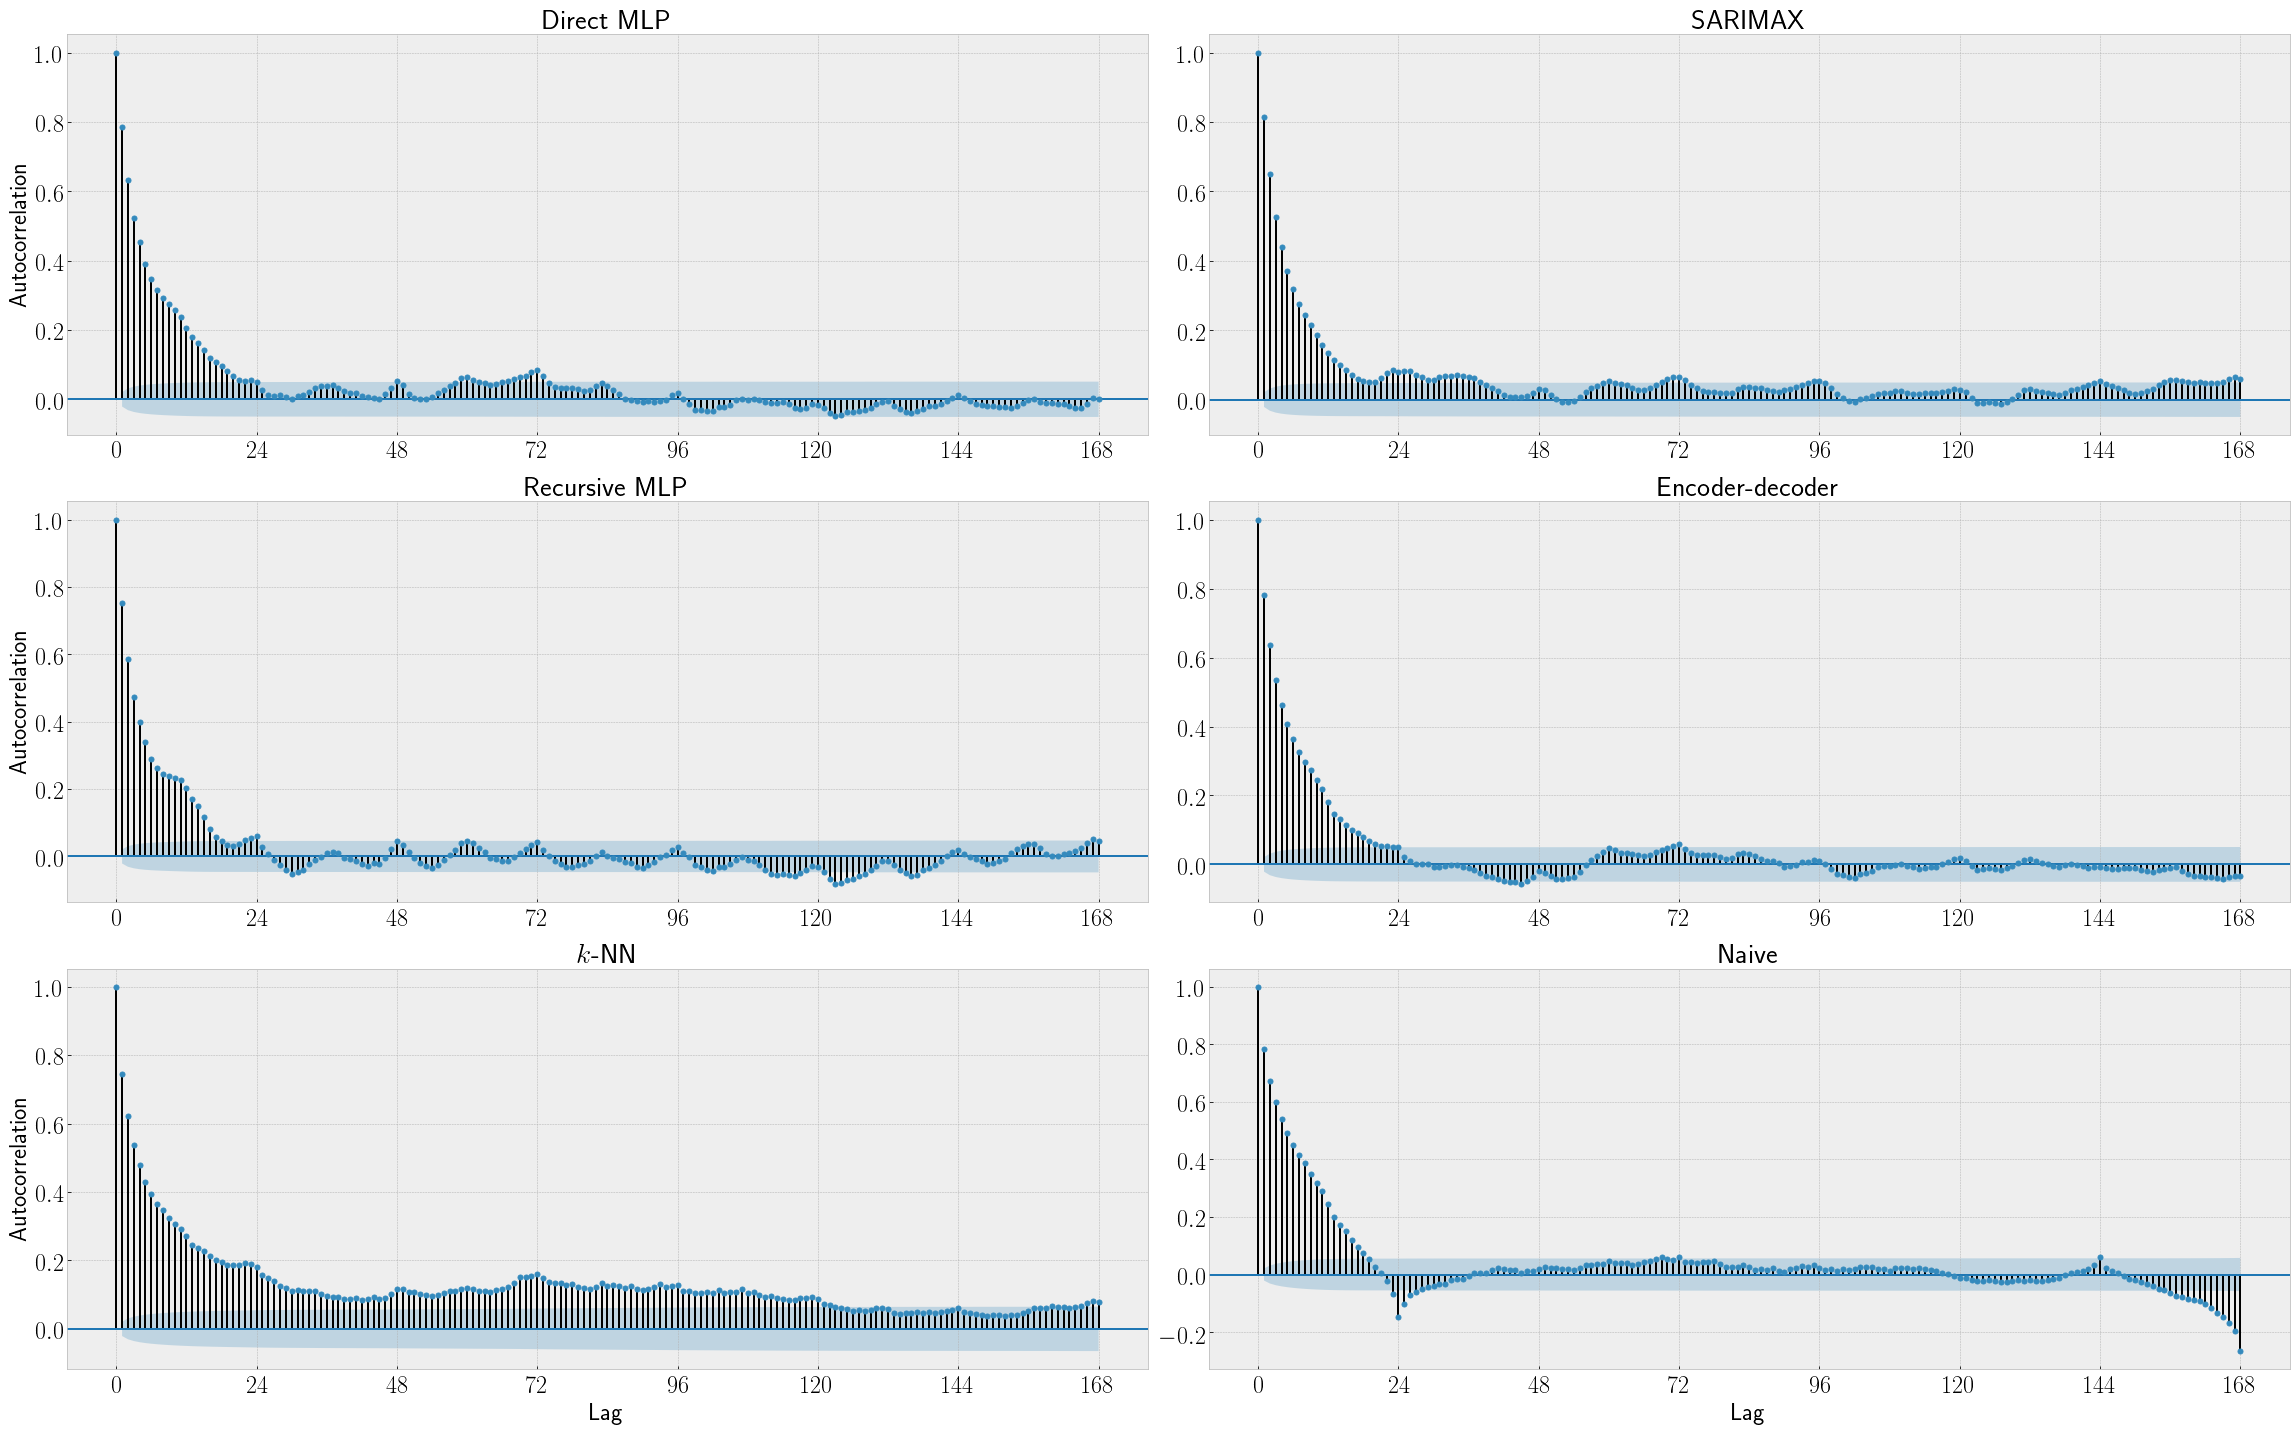

In [21]:
acfplot(inputdf,168)

In [22]:
def hourlyreductionplot(inputdf,style='bmh',figsize=(19,7)):
    inputdf=inputdf.loc['2018-01-01 00':'2018-12-31 23',:]
    Hours=list(range(24))
    models=['Direct MLP','SARIMAX','Recursive MLP','Encoder-Decoder','KNN','Naive']
    dict_mae={}
    dict_rmse={}
    for model in models:
        maereductionlist=[]
        rmsereductionlist=[]
        for hour in Hours:
            tmp=inputdf[inputdf.Hour==hour]
            mae=np.mean(np.absolute(tmp['Error '+model]))
            mae_residual=np.mean(np.absolute(tmp['price difference']))
            rmse=np.sqrt(np.mean(np.asarray(tmp['Error '+model])**2))
            rmse_residual=np.sqrt(np.mean(np.asarray(tmp['price difference'])**2))
            maereduction=np.round(1-mae/mae_residual, decimals=3)
            rmsereduction=np.round(1-rmse/rmse_residual, decimals=3)
            maereductionlist.append(maereduction)
            rmsereductionlist.append(rmsereduction)
        dict_mae[model]=maereductionlist
        dict_rmse[model]=rmsereductionlist
    plt.rcParams["text.usetex"]=True
    with plt.style.context(style):
        fig=plt.figure(figsize=figsize)
        layout=(1,2)
       
        ax1=plt.subplot2grid(layout,(0,0))
        ax2=plt.subplot2grid(layout,(0,1))
        palette = plt.get_cmap('Set1')
        num=0
        for model in models:
            num+=1
            if model == 'KNN':
                ax1.plot(Hours,dict_mae[model],label=model, color=palette(num+3))
                ax2.plot(Hours,dict_rmse[model], color=palette(num+3))
            else:
                ax1.plot(Hours,dict_mae[model],label=model, color=palette(num))
                ax2.plot(Hours,dict_rmse[model], color=palette(num))
                
        ax1.yaxis.set_major_formatter(PercentFormatter(1))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        ax1.set_xlabel('Hour',fontsize=16)
        ax1.set_ylabel('Reduction',fontsize=16)
        legends=models=['Direct MLP','SARIMAX','Recursive MLP','Encoder-Decoder','$k$-NN','Naive']
        ax1.legend(legends,fontsize=14)
    
        ax2.yaxis.set_major_formatter(PercentFormatter(1))
        ax1.set_title('MAE Reduction',fontsize=16)
        ax2.set_title('RMSE Reduction',fontsize=16)
        
        ax2.tick_params(axis='both', which='major', labelsize=16)
        ax2.set_xlabel('Hour',fontsize=16)
    plt.tight_layout()
    plt.savefig('FiguresInTheThesis/hourlyreduction.png',dpi=300,bbox_inches='tight')

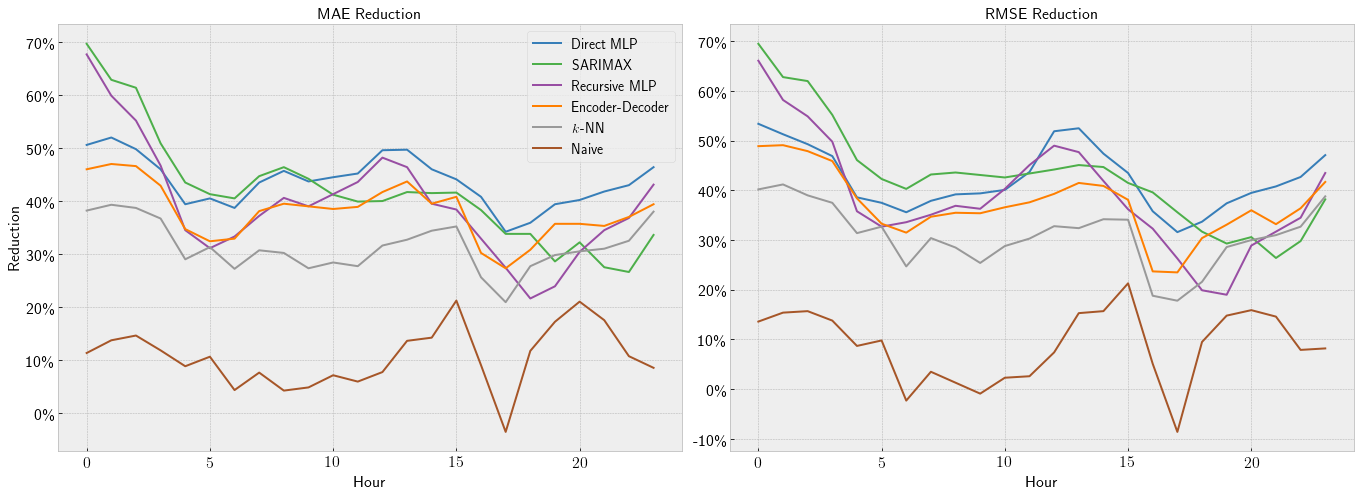

In [23]:
hourlyreductionplot(inputdf)

In [26]:
def errordistribution(inputdf,style='bmh',figsize=(30,30)):
    fundamental=inputdf.loc['2018-01-01 00':'2018-12-31 23','price difference']
    stdfundamental=np.round(np.std(fundamental),decimals=2)
    skewfundamental=np.round(skew(np.asarray(fundamental)),decimals=2)
    kurtfundamental=np.round(kurtosis(np.asarray(fundamental)),decimals=2)
    
    directmlp=inputdf.loc['2018-01-01 00':'2018-12-31 23','Error Direct MLP']
    stddirectmlp=np.round(np.std(directmlp),decimals=2)
    skewdirectmlp=np.round(skew(np.asarray(directmlp)),decimals=2)
    kurtdirectmlp=np.round(kurtosis(np.asarray(directmlp)),decimals=2)
    
    sarimax=inputdf.loc['2018-01-01 00':'2018-12-31 23','Error SARIMAX']
    stdsarimax=np.round(np.std(sarimax),decimals=2)
    skewsarimax=np.round(skew(np.asarray(sarimax)),decimals=2)
    kurtsarimax=np.round(kurtosis(np.asarray(sarimax)),decimals=2)
    
    recursivemlp=inputdf.loc['2018-01-01 00':'2018-12-31 23','Error Recursive MLP']
    stdrecursivemlp=np.round(np.std(recursivemlp),decimals=2)
    skewrecursivemlp=np.round(skew(np.asarray(recursivemlp)),decimals=2)
    kurtrecursivemlp=np.round(kurtosis(np.asarray(recursivemlp)),decimals=2)
    
    ende=inputdf.loc['2018-01-01 00':'2018-12-31 23','Error Encoder-Decoder']
    stdende=np.round(np.std(ende),decimals=2)
    skewende=np.round(skew(np.asarray(ende)),decimals=2)
    kurtende=np.round(kurtosis(np.asarray(ende)),decimals=2)
    
    knn=inputdf.loc['2018-01-01 00':'2018-12-31 23','Error KNN']
    stdknn=np.round(np.std(knn),decimals=2)
    skewknn=np.round(skew(np.asarray(knn)),decimals=2)
    kurtknn=np.round(kurtosis(np.asarray(knn)),decimals=2)
    
    naive=inputdf.loc['2018-01-01 00':'2018-12-31 23','Error Naive']
    stdnaive=np.round(np.std(naive),decimals=2)
    skewnaive=np.round(skew(np.asarray(naive)),decimals=2)
    kurtnaive=np.round(kurtosis(np.asarray(naive)),decimals=2)
    anno_opts1 = dict(xy=(0.8, 0.5), xycoords='axes fraction',
                 va='center', ha='center',fontsize=24)
    anno_opts2 = dict(xy=(0.8, 0.35), xycoords='axes fraction',
                 va='center', ha='center',fontsize=24)
    anno_opts3 = dict(xy=(0.8, 0.15), xycoords='axes fraction',
                 va='center', ha='center',fontsize=24)
    
    with plt.style.context(style):
        fig=plt.figure(figsize=figsize)
        gs=gridspec.GridSpec(4,4)
        gs.update(hspace=0.5)
        ax1=plt.subplot(gs[0,1:3])
        ax2=plt.subplot(gs[1,:2],)
        ax3=plt.subplot(gs[1,2:])
        ax4=plt.subplot(gs[2,:2],)
        ax5=plt.subplot(gs[2,2:])
        ax6=plt.subplot(gs[3,:2],)
        ax7=plt.subplot(gs[3,2:])
        
        ax1.set_title('Fundamental model',fontsize=26)
        ax1.hist(fundamental,bins=100,density=True)
        ax1.annotate('$\sigma$: '+str(stdfundamental),**anno_opts1)
        ax1.annotate('Skew: '+str(skewfundamental),**anno_opts2)
        ax1.annotate('Kurtosis: '+str(kurtfundamental),**anno_opts3)
        
        ax2.set_title('Direct MLP',fontsize=26)
        ax2.hist(directmlp,bins=100,density=True)
        ax2.annotate('$\sigma$: '+str(stddirectmlp),**anno_opts1)
        ax2.annotate('Skew: '+str(skewdirectmlp),**anno_opts2)
        ax2.annotate('Kurtosis: '+str(kurtdirectmlp),**anno_opts3)
        
        ax3.set_title('SARIMAX',fontsize=26)
        ax3.hist(sarimax,bins=100,density=True)
        ax3.annotate('$\sigma$: '+str(stdsarimax),**anno_opts1)
        ax3.annotate('Skew: '+str(skewsarimax),**anno_opts2)
        ax3.annotate('Kurtosis: '+str(kurtsarimax),**anno_opts3)
        
        ax4.hist(recursivemlp,bins=100,density=True)
        ax4.set_title('Recursive MLP',fontsize=26)
        ax4.annotate('$\sigma$: '+str(stdrecursivemlp),**anno_opts1)
        ax4.annotate('Skew: '+str(skewrecursivemlp),**anno_opts2)
        ax4.annotate('Kurtosis: '+str(kurtrecursivemlp),**anno_opts3)
        
        ax5.hist(ende,bins=100,density=True)
        ax5.set_title('Encoder-Decoder',fontsize=26)
        ax5.annotate('$\sigma$: '+str(stdende),**anno_opts1)
        ax5.annotate('Skew: '+str(skewende),**anno_opts2)
        ax5.annotate('Kurtosis: '+str(kurtende),**anno_opts3)
        
        ax6.hist(knn,bins=100,density=True)
        ax6.set_title('$k$-NN',fontsize=26)
        ax6.annotate('$\sigma$: '+str(stdknn),**anno_opts1)
        ax6.annotate('Skew: '+str(skewknn),**anno_opts2)
        ax6.annotate('Kurtosis: '+str(kurtknn),**anno_opts3)
        
        ax7.hist(naive,bins=100,density=True)
        ax7.set_title('Naive',fontsize=26)
        ax7.annotate('$\sigma$: '+str(stdnaive),**anno_opts1)
        ax7.annotate('Skew: '+str(skewnaive),**anno_opts2)
        ax7.annotate('Kurtosis: '+str(kurtnaive),**anno_opts3)
        
        ax6.set_xlabel('Error (€/MWh)',fontsize=24)
        ax7.set_xlabel('Error (€/MWh)',fontsize=24)
        ax1.set_ylabel('Probability',fontsize=24)
        ax2.set_ylabel('Probability',fontsize=24)
        ax4.set_ylabel('Probability',fontsize=24)
        ax6.set_ylabel('Probability',fontsize=24)
        
        ax1.tick_params(axis='both', which='major', labelsize=22)
        ax2.tick_params(axis='both', which='major', labelsize=22)
        ax3.tick_params(axis='both', which='major', labelsize=22)
        ax4.tick_params(axis='both', which='major', labelsize=22)
        ax5.tick_params(axis='both', which='major', labelsize=22)
        ax6.tick_params(axis='both', which='major', labelsize=22)
        ax7.tick_params(axis='both', which='major', labelsize=22)
    plt.savefig('FiguresInTheThesis/errordistributiontest.png',dpi=200,bbox_inches='tight')    
    plt.show()
    

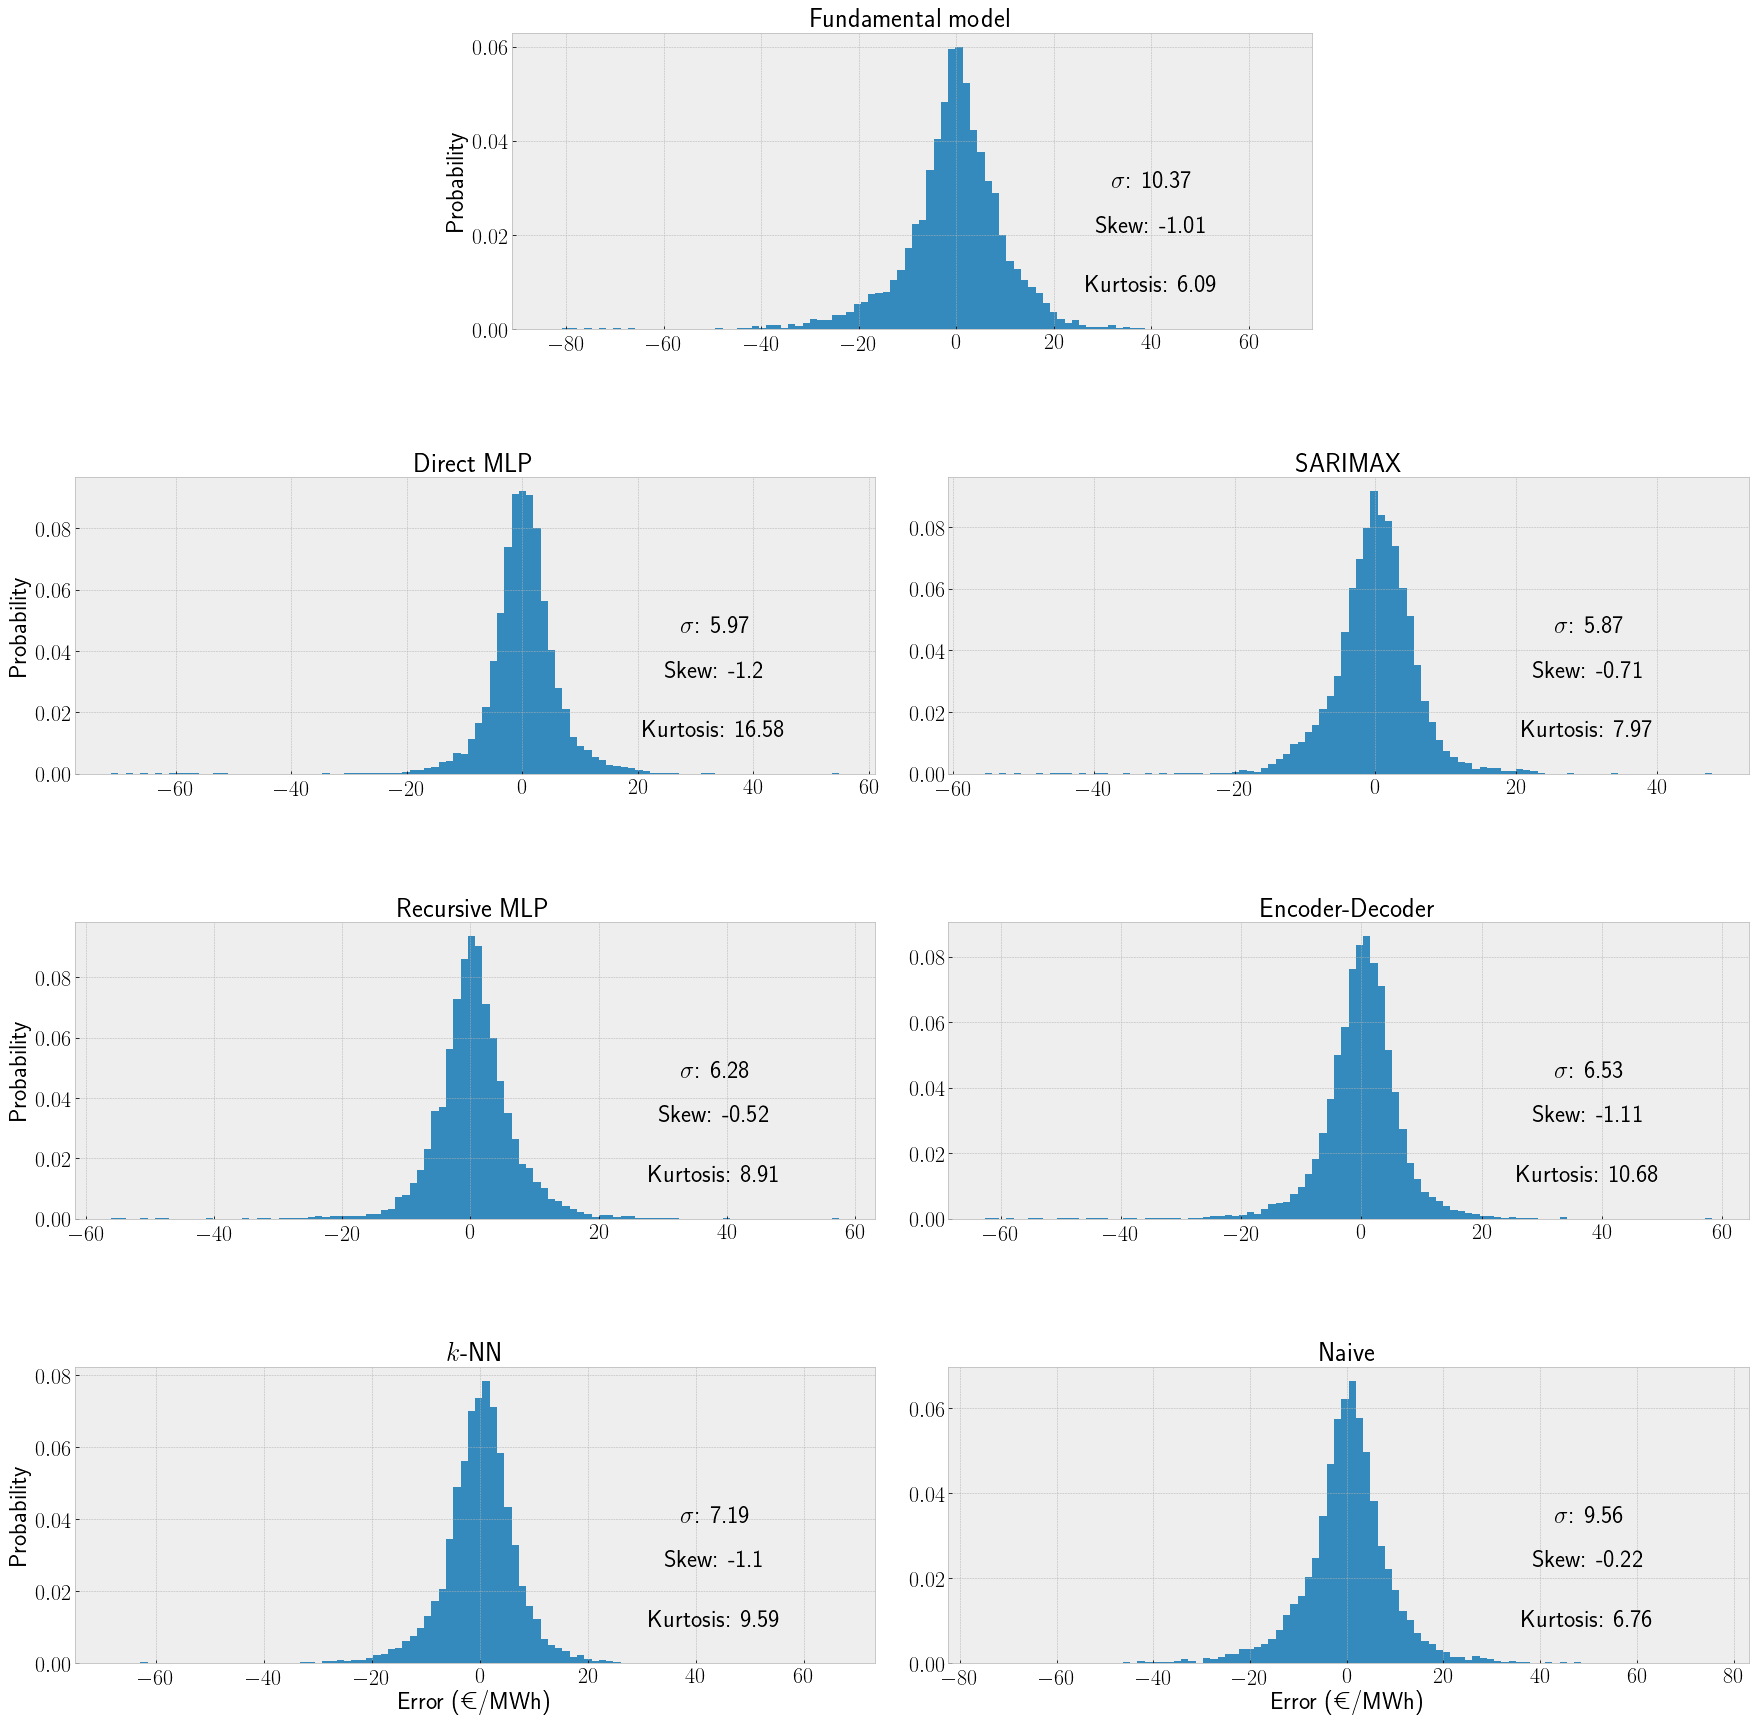

In [27]:
errordistribution(inputdf)

In [28]:
def yearlyreductionplot(inputdf,style='bmh',figsize=(18,6)):
    inputdf=inputdf.loc['2015-01-01 00':'2018-12-31 23',:]
    years=list(range(2015,2019))
    models=['Direct MLP','SARIMAX','Recursive MLP','Encoder-Decoder','KNN','Naive']
    dict_mae={}
    dict_rmse={}
    for model in models:
        maereductionlist=[]
        rmsereductionlist=[]
        for year in years:
            tmp=inputdf.loc[str(year)+'-01-01 00':str(year)+'-12-31 23',:]
            mae=np.mean(np.absolute(tmp['Error '+model]))
            mae_residual=np.mean(np.absolute(tmp['price difference']))
            rmse=np.sqrt(np.mean(np.asarray(tmp['Error '+model])**2))
            rmse_residual=np.sqrt(np.mean(np.asarray(tmp['price difference'])**2))
            maereduction=np.round(1-mae/mae_residual, decimals=3)
            rmsereduction=np.round(1-rmse/rmse_residual, decimals=3)
            maereductionlist.append(maereduction)
            rmsereductionlist.append(rmsereduction)
        dict_mae[model]=maereductionlist
        dict_rmse[model]=rmsereductionlist
    plt.rcParams["text.usetex"]=True
    with plt.style.context(style):
        fig=plt.figure(figsize=figsize)
        layout=(1,2)
       
        ax1=plt.subplot2grid(layout,(0,0))
        ax2=plt.subplot2grid(layout,(0,1))
        palette = plt.get_cmap('Set1')
        num=0
        for model in models:
            num+=1
            if model == 'KNN':
                ax1.plot(years,dict_mae[model],label=model, color=palette(num+3))
                ax2.plot(years,dict_rmse[model], color=palette(num+3))
            else:
                ax1.plot(years,dict_mae[model],label=model, color=palette(num))
                ax2.plot(years,dict_rmse[model], color=palette(num))
                
        ax1.yaxis.set_major_formatter(PercentFormatter(1))
        ax1.tick_params(axis='both', which='major', labelsize=16)
        ax1.set_xlabel('Year',fontsize=16)
        ax1.set_ylabel('Reduction',fontsize=16)
        legends=models=['Direct MLP','SARIMAX','Recursive MLP','Encoder-Decoder','$k$-NN','Naive']
        ax1.legend(legends,fontsize=12)
        ax1.set_xticks(years)
    
        ax2.yaxis.set_major_formatter(PercentFormatter(1))
        ax1.set_title('MAE Reduction',fontsize=16)
        ax2.set_title('RMSE Reduction',fontsize=16)
        
        ax2.tick_params(axis='both', which='major', labelsize=16)
        ax2.set_xlabel('Year',fontsize=16)
        ax2.set_xticks(years)
    plt.tight_layout()
    plt.savefig('FiguresInTheThesis/yearlyreduction.png',dpi=300,bbox_inches='tight')

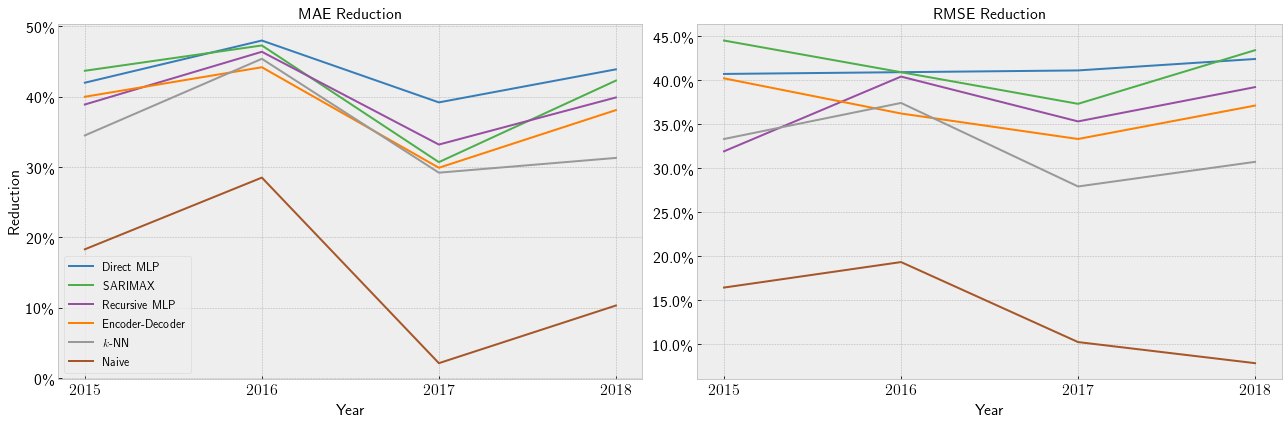

In [29]:
yearlyreductionplot(inputdf)

In [39]:
def ensemblemodel(inputdf,figsize=(25,10)):
    y=inputdf.loc['2018-08-01 00':'2018-08-31 23','price electricity real']
    yensemble=inputdf.loc['2018-08-01 00':'2018-08-31 23','Price Average']
    ydirectmlp=inputdf.loc['2018-08-01 00':'2018-08-31 23','Price Direct MLP']
    ysarimax=inputdf.loc['2018-08-01 00':'2018-08-31 23','Price SARIMAX']
    yfundamental=inputdf.loc['2018-08-01 00':'2018-08-31 23','price estimator Model']
    index = pd.to_datetime(y.index)
    y=y.values
    yensemble=yensemble.values
    ydirectmlp=ydirectmlp.values
    ysarimax=ysarimax.values
    yfundamental=yfundamental.values
    ticks_to_use= index[::72]
    labels=[ i.strftime("%m/%d") for i in ticks_to_use]
    ylabels=np.arange(0,110,step=10)
   
    fig=plt.figure(figsize=figsize)
    plt.plot(index,y,label='Actual day-ahead prices') 
    plt.plot(index,yensemble,label='Predicted prices of ensemble model',color='black')
    plt.plot(index,yfundamental,label='Predicted prices of fundamental model')
        #plt.plot(index,ysarimax,label='Prediction SARIMAX')
        #plt.plot(index,ydirectmlp,label='Prediction Direct MLP')
    ax=plt.gca()
    ax.set_xticks(ticks_to_use)
    ax.set_xticklabels(labels,fontsize=19)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 19)
    plt.legend(fontsize=19,loc=0)
    plt.grid(False)
    plt.ylabel('Price (€/MWh)',fontsize=19)
    plt.xlabel('Time (h)',fontsize=19)
    plt.savefig('FiguresInTheThesis/actualvsensemble.png',dpi=300,bbox_inches='tight')
    plt.show()

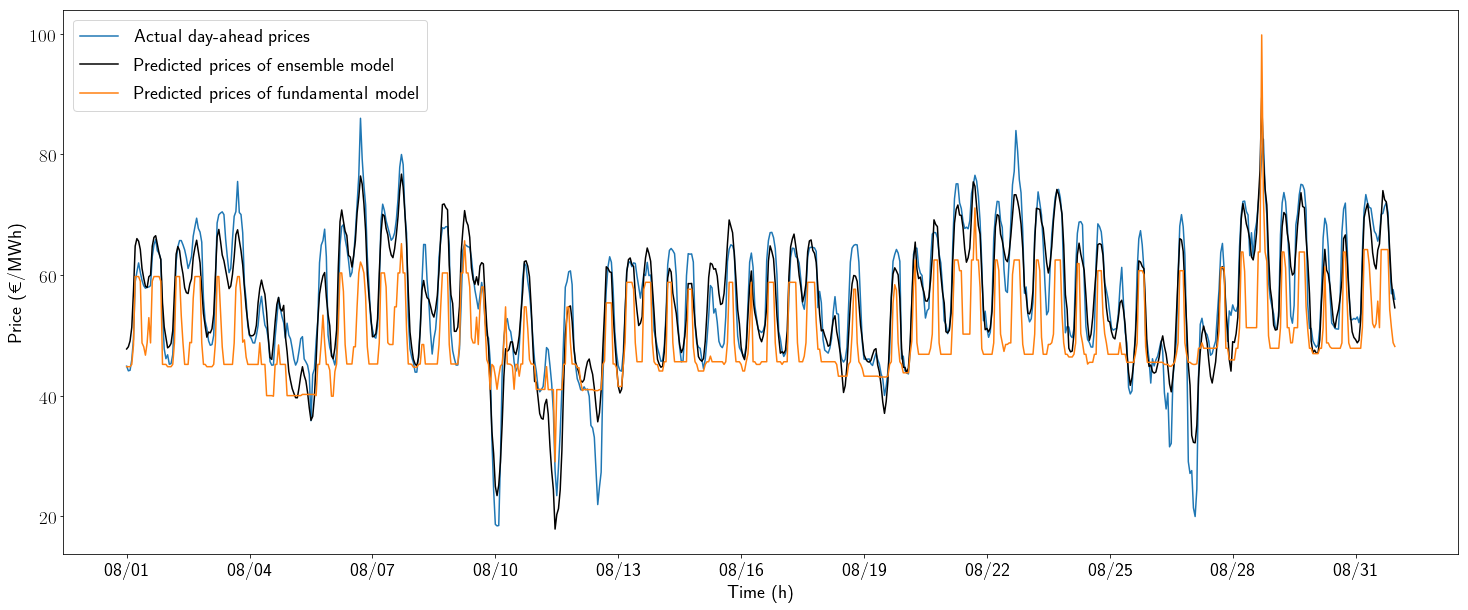

In [40]:
ensemblemodel(inputdf)

In [20]:
import statsmodels.tsa.stattools, statsmodels.graphics.tsaplots

In [82]:
def ensembleacf(inputdf,style='bmh'):
    ensemble=inputdf.loc['2018-01-01 00':'2018-12-31 23','Error Average']
    fundamental=inputdf.loc['2018-01-01 00':'2018-12-31 23','price difference']
    
    with plt.style.context(style):
        autocorr_plot,ax=plt.subplots(figsize=(25,10))
        xi=list(range(0,168+24,24))
        ax.set_xlabel('Lag',fontsize=22)
        ax.set_xticks(xi)
        ax.tick_params(axis='both', which='major', labelsize=22)
        autocorr_plot=statsmodels.graphics.tsaplots.plot_acf(fundamental,lags=168,ax=ax, label='Fundamental model',title='')
        autocorr_plot=statsmodels.graphics.tsaplots.plot_acf(ensemble,lags=168,ax=ax, label='Ensemble model',color='black',title='')
        handles, labels= ax.get_legend_handles_labels()
        handles=[handles[1],handles[3]]
        labels =[labels[1],labels[3]]
        ax.set_ylabel('Autocorrelation',fontsize=22)
        ax.legend(handles=handles, labels=labels,loc='best',shadow=True, numpoints=2,fontsize=20)
    plt.savefig('FiguresInTheThesis/ensemblefundamentalacf.png',dpi=300,bbox_inches='tight')    
    plt.show()

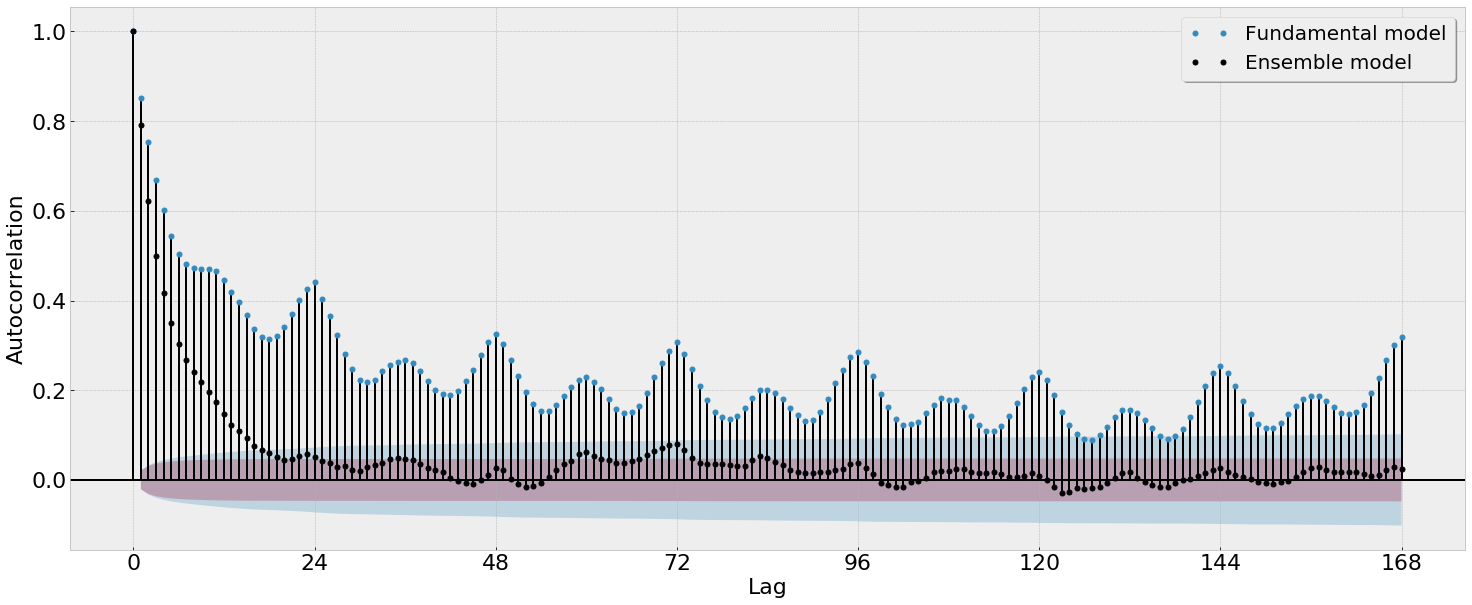

In [83]:
ensembleacf(inputdf)